%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score

In [99]:
train = pd.read_csv('train.csv', header = 0)
test=pd.read_csv('test.csv',header=0)
gender_submission=pd.read_csv('gender_submission.csv',header=0)

In [88]:
train_objs_num=len(train)
Y=['Survived']
data=pd.concat(objs=[train.drop(columns=['Survived']),test],axis=0)
train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
(train.head(5))

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,Total,Percent
Cabin,687,0.771044
Age,177,0.198653
Embarked,2,0.002245
Fare,0,0.000000
Ticket,0,0.000000


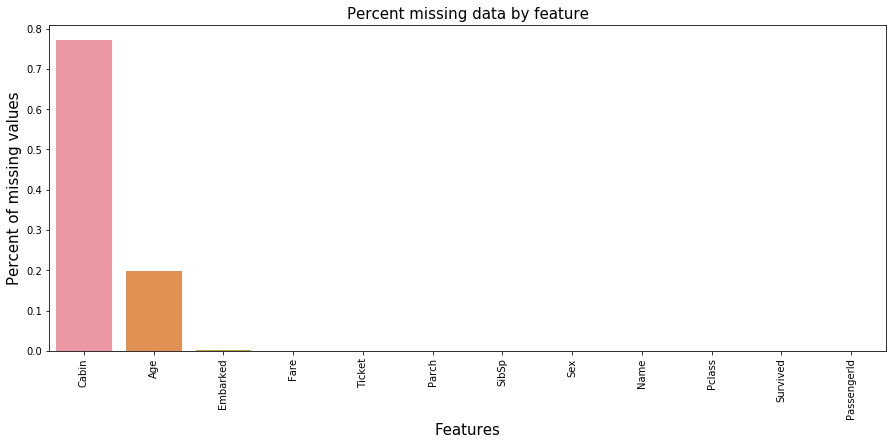

In [96]:
total=train.isnull().sum().sort_values(ascending=False)
percent=(train.isnull().sum()/train.isnull().count()).sort_values(ascending=False)
missing_data=pd.concat([total,percent],axis=1,keys=['Total','Percent'])
f,ax=plt.subplots(figsize=(15,6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index,y=missing_data['Percent'])
plt.xlabel('Features',fontsize=15)
plt.ylabel('Percent of missing values',fontsize=15)
plt.title('Percent missing data by feature',fontsize=15)
missing_data.head()

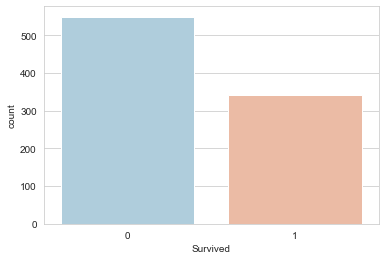

In [140]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

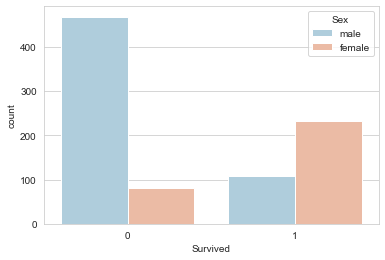

In [141]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette='RdBu_r')

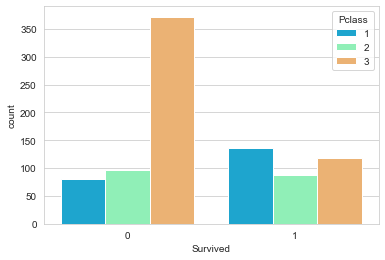

In [143]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

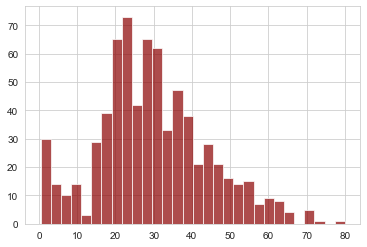

In [145]:
train['Age'].hist(bins=30,color='darkred',alpha=0.7)

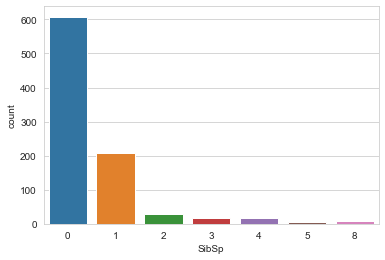

In [146]:
sns.countplot(x='SibSp',data=train)

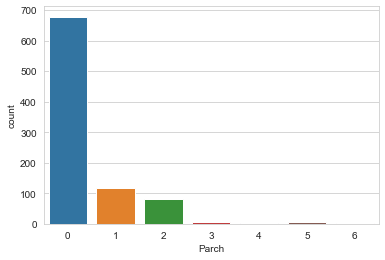

In [147]:
sns.countplot(x='Parch',data=train)

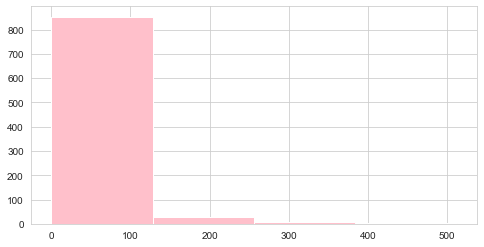

In [148]:
train['Fare'].hist(bins=4,color='pink',figsize=(8,4))

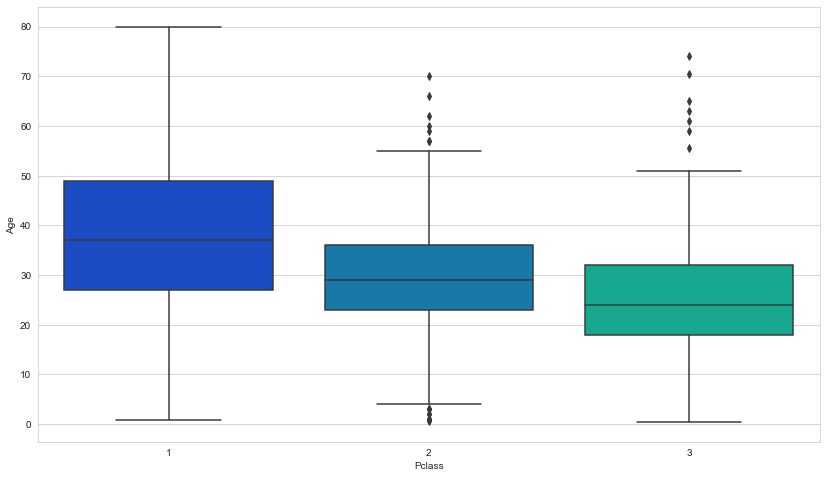

In [149]:
plt.figure(figsize=(14,8))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [151]:
def impute_age(cols):
    Age=cols[0]
    Pclass=cols[1]
    if pd.isnull(Age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
            return Age
            

In [152]:
train['Age']=train[['Age','Pclass']].apply(impute_age,axis=1)

In [153]:
train['Embarked']=train['Embarked'].fillna('P')

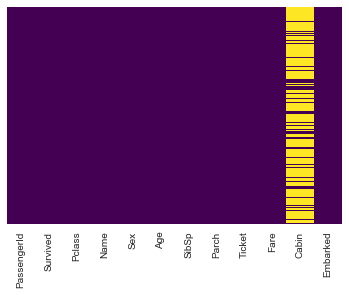

In [156]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')



In [157]:
train.drop('Cabin',axis=1,inplace=True)
        

In [158]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [159]:
train.dropna(inplace=True)

In [160]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


In [161]:
sex=pd.get_dummies(train['Sex'],drop_first=True)
embark=pd.get_dummies(train['Embarked'],drop_first=True)


In [162]:
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [163]:
train=pd.concat([train,sex,embark],axis=1)

In [164]:
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,P,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,0,1


In [165]:
train.corr()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,P,Q,S
PassengerId,1.000000e+00,-0.005007,-0.035144,0.035840,-0.057527,-0.001652,0.012658,0.042939,6.756184e-19,-0.033606,0.022148
Survived,-5.006661e-03,1.000000,-0.338481,-0.047255,-0.035322,0.081629,0.257307,-0.543351,6.009485e-02,0.003650,-0.155660
Pclass,-3.514399e-02,-0.338481,1.000000,-0.408487,0.083081,0.018443,-0.549500,0.131900,-7.428233e-02,0.221009,0.081720
Age,3.583994e-02,-0.047255,-0.408487,1.000000,-0.243526,-0.171095,0.123784,0.078421,7.500930e-02,-0.081658,0.007763
SibSp,-5.752683e-02,-0.035322,0.083081,-0.243526,1.000000,0.414838,0.159651,-0.114631,-2.250825e-02,-0.026354,0.070941
Parch,-1.652012e-03,0.081629,0.018443,-0.171095,0.414838,1.000000,0.216225,-0.245489,-2.246691e-02,-0.081228,0.063036
Fare,1.265822e-02,0.257307,-0.549500,0.123784,0.159651,0.216225,1.000000,-0.182333,4.564557e-02,-0.117216,-0.166603
male,4.293888e-02,-0.543351,0.131900,0.078421,-0.114631,-0.245489,-0.182333,1.000000,-6.429648e-02,-0.074115,0.125722
P,6.756184e-19,0.060095,-0.074282,0.075009,-0.022508,-0.022467,0.045646,-0.064296,1.000000e+00,-0.014588,-0.076588
Q,-3.360570e-02,0.003650,0.221009,-0.081658,-0.026354,-0.081228,-0.117216,-0.074115,-1.458805e-02,1.000000,-0.496624


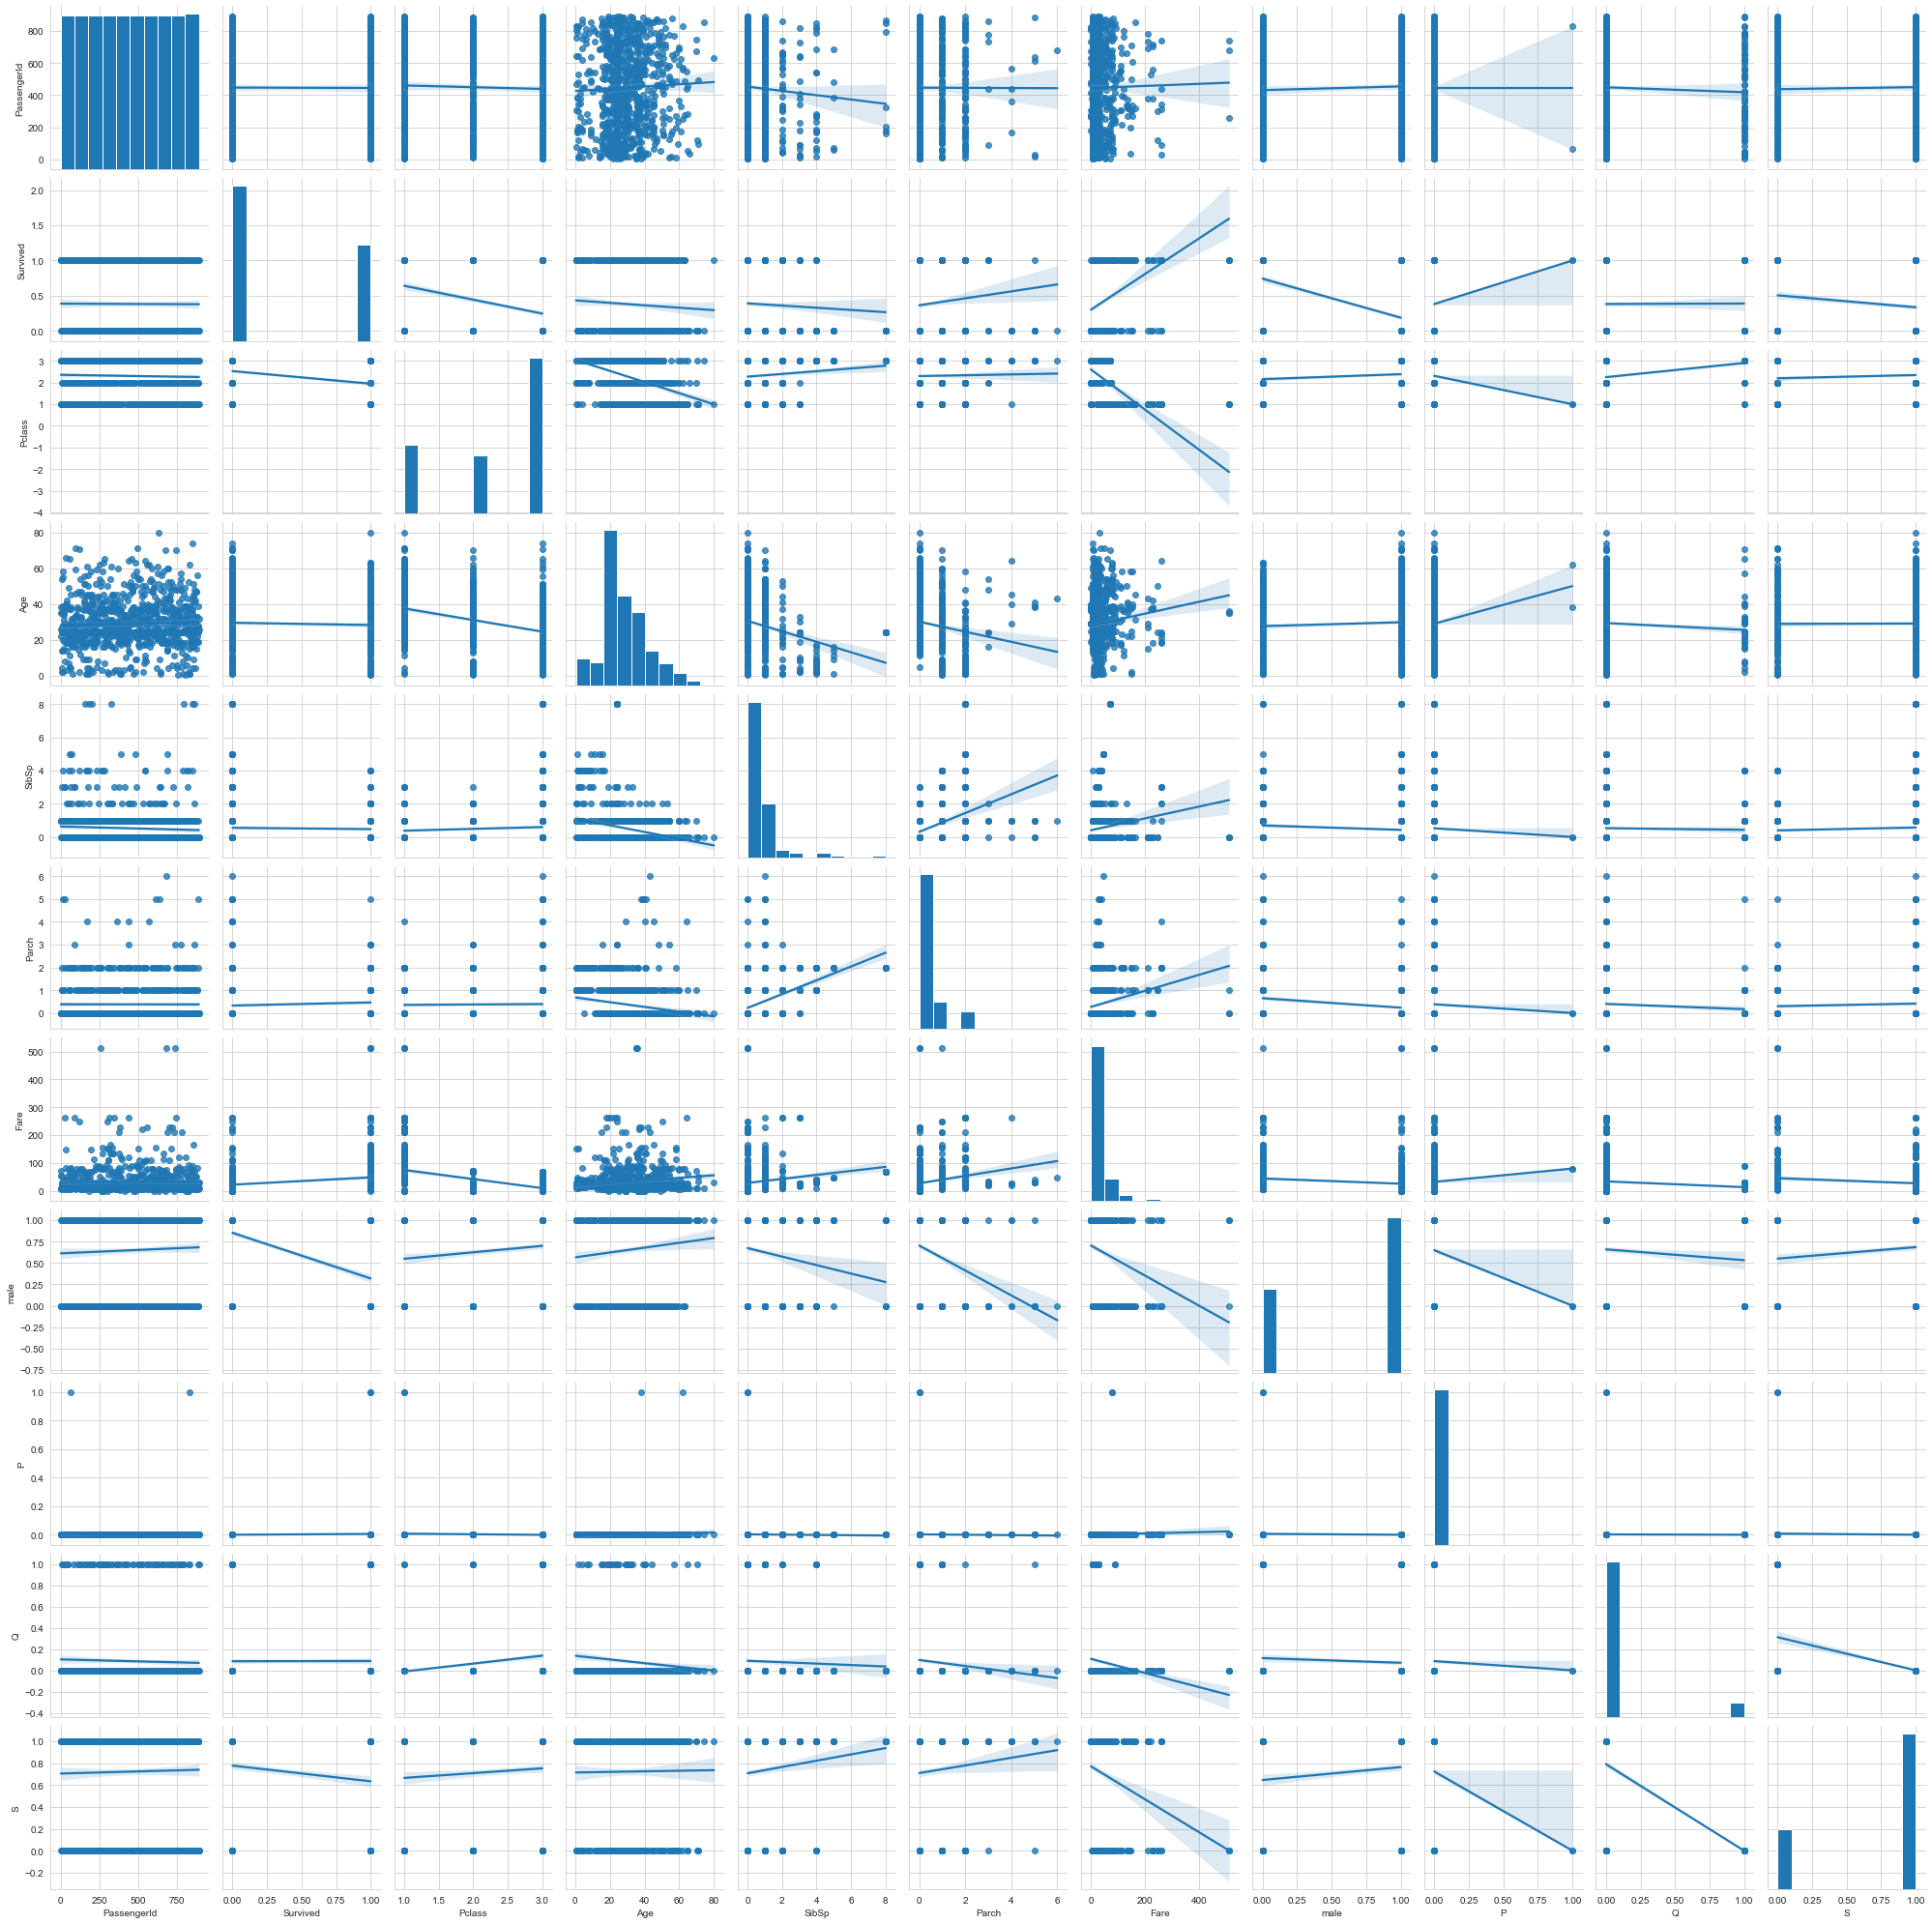

In [166]:
sns.pairplot(train,kind='reg')
plt.show()

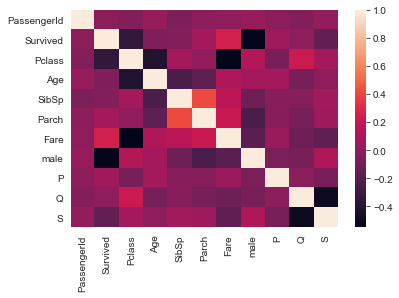

In [167]:
sns.heatmap(train.corr())
plt.show()

In [168]:
from sklearn.model_selection import train_test_split

In [171]:
X_train,X_test,y_train,y_test=train_test_split(train.drop(['Survived'],axis=1),train['Survived'],test_size=0.10,random_state=101)

In [172]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver = 'liblinear', class_weight="balanced")

In [173]:
log_reg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [176]:
y_pred = log_reg.predict(X_test)
print(y_pred)

[0 1 1 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0
 0 0 1 1 1 1 0 0 0 0 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 1 0 0 1 1 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 1 0 0 1 0 1]


In [177]:
from sklearn.metrics import accuracy_score,precision_score,recall_score, roc_curve, auc, roc_auc_score,confusion_matrix,classification_report
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)

In [178]:
print('Accuracy is  :' ,accuracy)
print('Precision is  :',precision)
print('Recall is  :',recall)
print('Roc Auc is  :',roc_auc)
print('Confusion Matrix is  :\n',cm)

Accuracy is  : 0.8111111111111111
Precision is  : 0.8055555555555556
Recall is  : 0.7435897435897436
Roc Auc is  : 0.8031674208144797
Confusion Matrix is  :
 [[44  7]
 [10 29]]


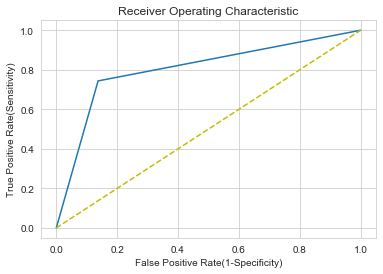

Area under the curve:  0.803


In [179]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0,1],[0,1],'y--')
#plt.xlim([0,1])
#plt.ylim([0,1])
plt.title('Receiver Operating Characteristic')
plt.ylabel('True Positive Rate(Sensitivity)')
plt.xlabel('False Positive Rate(1-Specificity)')
plt.show()

print("Area under the curve: ",round(auc(false_positive_rate, true_positive_rate),3))

#Decision tree classifier

In [180]:
from sklearn.tree import DecisionTreeClassifier


In [184]:
data=DecisionTreeClassifier()
data.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [185]:
data_pred=data.predict(X_test)

In [186]:
print(confusion_matrix(y_test,data_pred))

[[43  8]
 [15 24]]


In [187]:
print (classification_report(y_test,data_pred))

              precision    recall  f1-score   support

           0       0.74      0.84      0.79        51
           1       0.75      0.62      0.68        39

    accuracy                           0.74        90
   macro avg       0.75      0.73      0.73        90
weighted avg       0.75      0.74      0.74        90



#RANDOM FOREST CLASSIFIER

In [188]:
from sklearn.ensemble import RandomForestClassifier

In [189]:
rf=RandomForestClassifier(n_estimators=400)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=400,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [190]:
rf_pre=rf.predict(X_test)

In [191]:
print(confusion_matrix(y_test,rf_pre))

[[48  3]
 [15 24]]


In [192]:
print(classification_report(y_test,rf_pre))

              precision    recall  f1-score   support

           0       0.76      0.94      0.84        51
           1       0.89      0.62      0.73        39

    accuracy                           0.80        90
   macro avg       0.83      0.78      0.78        90
weighted avg       0.82      0.80      0.79        90

